# Step 1 – Data Preparation

In [1]:
print("PRINOM")

PRINOM


In [2]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords

# Load dataset without header
df = pd.read_csv("/kaggle/input/imdb-movie-reviews-dataset/test_data (1).csv",
                 header=None, names=["review", "sentiment"])

# Delete first row
df = df.drop(index=0).reset_index(drop=True)

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Cleaning function
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Lowercase
    text = text.lower()
    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
df['clean_review'] = df['review'].apply(clean_text)

# Train-Test Split (80/20)
train_df, test_df = train_test_split(
    df[['clean_review', 'sentiment']],
    test_size=0.2,
    random_state=42,
    stratify=df['sentiment']
)

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Train size: (20000, 2)
Test size: (5000, 2)


In [4]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [5]:
train_df

,clean_review,sentiment
14949,nurse betty really interesting movie guess kno...,1
10124,drifting around bootlegs sometimes thought urb...,0
24528,radio beautiful movie based real story mentall...,1
2535,worse ways spend evening watching movie althou...,1
15965,vidor shines judith truly strong compassionate...,1
...,...,...
20171,since cartoon made old days felix talks using ...,1
15907,love vampire lore fan gothic horror might want...,1
20902,anna christie greta garbo returns see father c...,0
10445,time kind film transition days sound silent pl...,0


In [6]:
test_df

,clean_review,sentiment
6180,im big fan musicals always enamored ms haywort...,1
12367,im amazed reviews ive looked nobody seems noti...,1
17844,oh awfully movie dont know horror film drama c...,0
8007,dont really know start herejust imagine movie ...,0
5520,movie great funny pauly funny best looking gir...,1
...,...,...
5288,kite runner beautiful poignant moving particul...,1
16005,randolph scott standards disappointing heavyha...,0
20522,note saw approximately last half movie feel fr...,0
13510,film marked end serious universal monsters era...,1


Download the dataset

In [3]:
# Save the cleaned dataset
df.to_csv("cleaned_imdb_reviews.csv", index=False)

# For Kaggle: Create a download link
from IPython.display import FileLink
FileLink("cleaned_imdb_reviews.csv")


/kaggle/working/cleaned_imdb_reviews.csv

# Step 2 – Model Training


In [7]:
print(df.head())


                                              review  sentiment  \
0  I did not enjoy the film Eraser whatsoever. It...          0   
1  Be very afraid of anyone who likes this film. ...          0   
2  The 3rd and last big screen spin off from the ...          0   
3  Barely three and a half years after just scrap...          1   
4  I'm a big fan of the demonic puppets. Looking ...          0   

                                        clean_review  
0  enjoy film eraser whatsoever awful acting bori...  
1  afraid anyone likes film probably inhaled many...  
2  rd last big screen spin popular itv sitcom ear...  
3  barely three half years scraping months run oc...  
4  im big fan demonic puppets looking surface one...  


Convert Text to TF-IDF Features

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit on training data & transform both train and test sets
X_train = vectorizer.fit_transform(train_df['clean_review'])
X_test = vectorizer.transform(test_df['clean_review'])

# Sentiment labels
y_train = train_df['sentiment'].astype(int)
y_test = test_df['sentiment'].astype(int)


In [9]:
y_train

14949    1
10124    0
24528    1
2535     1
15965    1
        ..
20171    1
15907    1
20902    0
10445    0
21777    1
Name: sentiment, Length: 20000, dtype: int64

Train Model (Naive Bayes)

In [10]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Evaluate Model (Naive Bayes)

In [11]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8584

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      2500
           1       0.86      0.85      0.86      2500

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


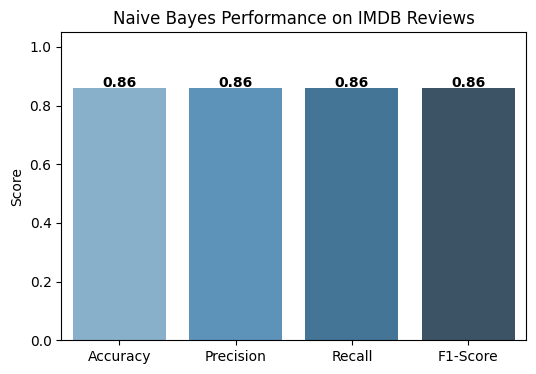

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Get classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics for "weighted avg" (handles class imbalance)
metrics = {
    'Accuracy': accuracy,
    'Precision': report['weighted avg']['precision'],
    'Recall': report['weighted avg']['recall'],
    'F1-Score': report['weighted avg']['f1-score']
}

# Create bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")

# Add labels on bars
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', fontweight='bold')

plt.ylim(0, 1.05)
plt.title("Naive Bayes Performance on IMDB Reviews")
plt.ylabel("Score")
plt.show()


Train Model (Logistic Regression)

In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Evaluate Model

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.888

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      2500
           1       0.88      0.90      0.89      2500

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


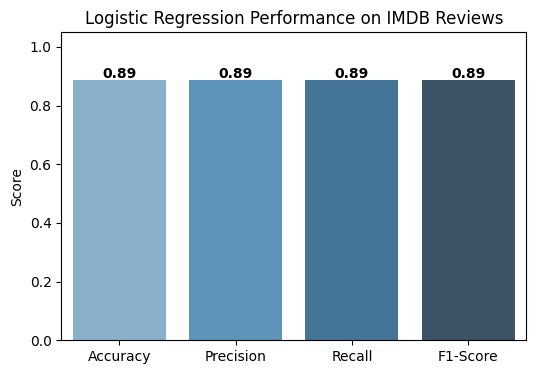

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Get classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics for "weighted avg" (handles class imbalance)
metrics = {
    'Accuracy': accuracy,
    'Precision': report['weighted avg']['precision'],
    'Recall': report['weighted avg']['recall'],
    'F1-Score': report['weighted avg']['f1-score']
}

# Create bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")

# Add labels on bars
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', fontweight='bold')

plt.ylim(0, 1.05)
plt.title("Logistic Regression Performance on IMDB Reviews")
plt.ylabel("Score")
plt.show()


# Step 3 – Evaluation

Report:

Accuracy

Precision

Recall

F1-score

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


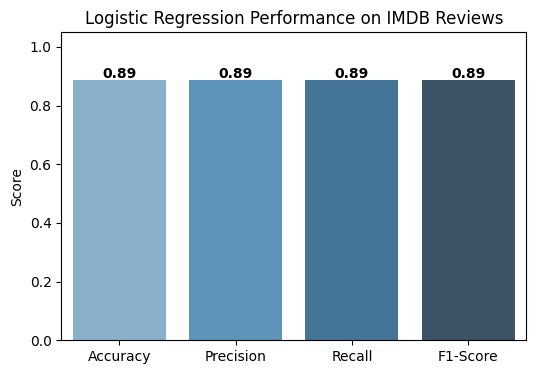

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Get classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics for "weighted avg" (handles class imbalance)
metrics = {
    'Accuracy': accuracy,
    'Precision': report['weighted avg']['precision'],
    'Recall': report['weighted avg']['recall'],
    'F1-Score': report['weighted avg']['f1-score']
}

# Create bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")

# Add labels on bars
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', fontweight='bold')

plt.ylim(0, 1.05)
plt.title("Logistic Regression Performance on IMDB Reviews")
plt.ylabel("Score")
plt.show()


confusion matrix

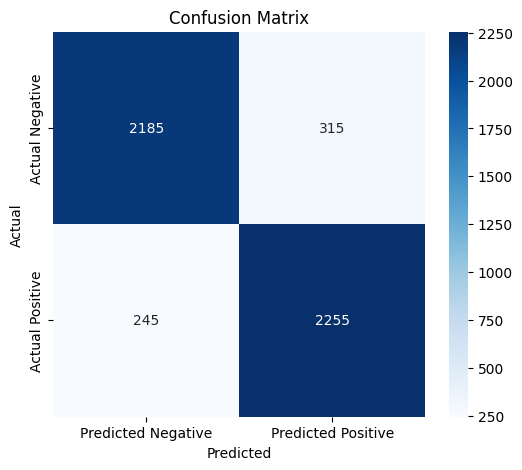

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict labels
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [18]:
import joblib

# Save the model to a .pkl file
joblib_file = "Logistic_Regression_imdb_model.pkl"
joblib.dump(model, joblib_file)

print(f"Model saved to {joblib_file}")


Model saved to Logistic_Regression_imdb_model.pkl


In [19]:
# Load the model
loaded_model = joblib.load(joblib_file)
loaded_model


LogisticRegression(max_iter=1000)

# Optimize model parameters for better accuracy.


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define pipeline: TF-IDF vectorizer + Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression(max_iter=1000))
])

# Hyperparameter grid to search
param_grid = {
    'tfidf__max_features': [3000, 5000, 7000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'lr__C': [0.1, 1, 10],           # Inverse of regularization strength
    'lr__penalty': ['l2'],           # Regularization type (use 'l2' for solver='lbfgs')
    'lr__solver': ['lbfgs']          # Solver compatible with l2 penalty
}

Run GridSearchCV

cross-validation (here 5 folds)

In [21]:

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit grid search on training data
grid_search.fit(train_df['clean_review'], train_df['sentiment'].astype(int))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'lr__C': [0.1, 1, 10], 'lr__penalty': ['l2'],
                         'lr__solver': ['lbfgs'],
                         'tfidf__max_features': [3000, 5000, 7000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy', verbose=1)

Show Best Parameters & Cross-Validation Score

In [22]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters found: {'lr__C': 1, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs', 'tfidf__max_features': 7000, 'tfidf__ngram_range': (1, 2)}
Best cross-validation accuracy: 0.8909


Evaluate Best Model on Test Set

In [23]:
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(test_df['clean_review'])

print("Test set accuracy:", accuracy_score(test_df['sentiment'].astype(int), y_test_pred))
print("\nClassification Report:\n", classification_report(test_df['sentiment'].astype(int), y_test_pred))


Test set accuracy: 0.8914

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      2500
           1       0.88      0.90      0.89      2500

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



# Step 4 – Bonus (Try a Deep Learning model.)


Prepare Text Data

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab_size = 10000
max_seq_len = 200

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['clean_review'])

X_train_seq = tokenizer.texts_to_sequences(train_df['clean_review'])
X_test_seq = tokenizer.texts_to_sequences(test_df['clean_review'])

X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_len, padding='post', truncating='post')

y_train = train_df['sentiment'].astype(int).values
y_test = test_df['sentiment'].astype(int).values


2025-08-14 14:52:41.369122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755183161.531658      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755183161.578806      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Build LSTM Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=64),
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


I0000 00:00:1755183177.427959      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755183177.428713      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train Model

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 154s 570ms/step - accuracy: 0.6443 - loss: 0.6009 - val_accuracy: 0.8385 - val_loss: 0.3711
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 140s 562ms/step - accuracy: 0.8785 - loss: 0.3136 - val_accuracy: 0.8457 - val_loss: 0.3931
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 564ms/step - accuracy: 0.9162 - loss: 0.2310 - val_accuracy: 0.8570 - val_loss: 0.3566
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 564ms/step - accuracy: 0.9383 - loss: 0.1764 - val_accuracy: 0.8577 - val_loss: 0.3929
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 564ms/step - accuracy: 0.9442 - loss: 0.1617 - val_accuracy: 0.8575 - val_loss: 0.4082
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 564ms/step - accuracy: 0.9590 - loss: 0.1139 - val_accuracy: 0.8593 - val_loss: 0.4565


In [27]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


157/157 - 25s - 160ms/step - accuracy: 0.8530 - loss: 0.3661
Test Accuracy: 0.8530


# Demo script: where a user inputs a sentence, and the model predicts sentiment.


In [28]:
def predict_sentiment(sentence, model, tokenizer, max_seq_len=200):
    seq = tokenizer.texts_to_sequences([sentence])
    padded = pad_sequences(seq, maxlen=max_seq_len, padding='post', truncating='post')
    pred_prob = model.predict(padded)[0][0]
    sentiment = "Positive" if pred_prob >= 0.5 else "Negative"
    return sentiment, pred_prob

# Example usage:
sentence = "This movie was fantastic and I loved it!"
sentiment, confidence = predict_sentiment(sentence, model, tokenizer)
print(f"Sentiment: {sentiment}, Confidence: {confidence:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sentiment: Positive, Confidence: 0.9174


# Save model & take user Input:


In [30]:
model.save("sentiment_lstm_model.h5")
print("\n✅ Model & tokenizer saved!")



✅ Model & tokenizer saved!


In [33]:
import pickle

# Assuming your tokenizer variable is named 'tokenizer'
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [35]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load model
model = load_model("sentiment_lstm_model.h5")

# Load tokenizer
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Max sequence length (use the same as training)
max_seq_len = 100  # Example — replace with your actual value


In [36]:
def predict_sentiment(text):
    # Convert text to sequence
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_seq_len, padding='post')

    # Predict
    pred = model.predict(padded)[0][0]

    # Interpret result
    sentiment = "Positive 😀" if pred >= 0.5 else "Negative 😞"
    return sentiment, pred


In [38]:
while True:
    user_input = input("\nEnter a sentence (or 'quit' to exit): ")
    if user_input.lower() == "quit":
        break

    sentiment, score = predict_sentiment(user_input)
    print(f"Sentiment: {sentiment} (score: {score:.4f})")



Enter a sentence (or 'quit' to exit):  This was a very funny movie, not Oscar-worthy, but definately the best dollar I've ever spent at Blockbuster! Rupert Penry Jones is a shining star, and very well might be the new Jude Law! So, if you're in the mood for a British Teen Flick- RENT IT!!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Sentiment: Positive 😀 (score: 0.8230)



Enter a sentence (or 'quit' to exit):  What a script, what a story, what a mess!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Sentiment: Negative 😞 (score: 0.4574)



Enter a sentence (or 'quit' to exit):  this movie simply does not work. The action scenes were shot to look stylish but just come out looking sloppy. seagal barely fights and a lot of his scenes are shot from the back ( if you look in some of the scenes it is not even him, but a 100 lb lighter stunt double) the movie is just all around BAD!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Sentiment: Negative 😞 (score: 0.0939)



Enter a sentence (or 'quit' to exit):  I love this Movie. It is a very good story.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Sentiment: Positive 😀 (score: 0.8545)



Enter a sentence (or 'quit' to exit):  quit
